## 泛映射类型

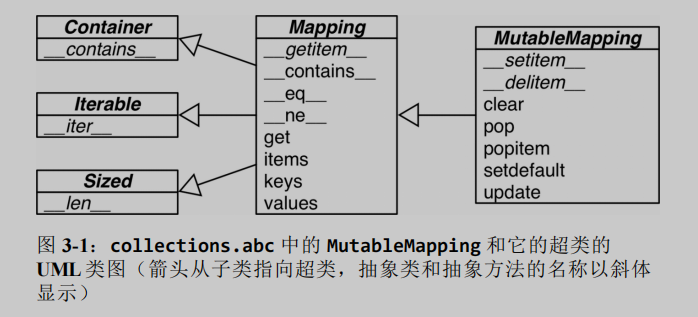

In [1]:
from collections import abc
my_dict ={}
isinstance(my_dict, abc.Mapping)

True

标准库里的所有映射类型都是利用 dict 来实现的，因此它们有个共同
的限制，即只有可散列的数据类型才能用作这些映射里的键（只有键有 这个要求，值并不需要是可散列的数据类型）。

什么是可散列的数据类型 在 Python 词汇表（https://docs.python.org/3/glossary.html#term- hashable）中，关于可散列类型的定义有这样一段话： <br>如果一个对象是可散列的，那么在这个对象的生命周期中，它 的散列值是不变的，而且这个对象需要实现__hash__() 方 法。另外可散列对象还要有 __qe__() 方法，这样才能跟其他 键做比较。如果两个可散列对象是相等的，那么它们的散列值 一定是一样的…… <br><br>原子不可变数据类型（str、bytes 和数值类型）都是可散列类型，frozenset 也是可散列的，因为根据其定义，frozenset 里 只能容纳可散列类型。元组的话，只有当一个元组包含的所有元素 都是可散列类型的情况下，它才是可散列的。

In [4]:
tt = (1,2,(30,40))
hash(tt), id(tt)

(-3907003130834322577, 2346613416512)

In [3]:
t1 = (1, 2,[30,40])  # 里面有可变类型，list无法散列
hash(t1)

TypeError: unhashable type: 'list'

直到我写这本书的时候，Python 词汇表 （https://docs.python.org/3/glossary.html#term-hashable）里还在 说“Python 里所有的不可变类型都是可散列的”。这个说法其实是不 准确的，比如虽然元组本身是不可变序列，它里面的元素可能是其 他可变类型的引用。

一般来讲用户自定义的类型的对象都是可散列的，散列值就是它们 的 id() 函数的返回值，所以所有这些对象在比较的时候都是不相 等的。如果一个对象实现了 __eq__ 方法，并且在方法中用到了这 个对象的内部状态的话，那么只有当所有这些内部状态都是不可变 的情况下，这个对象才是可散列的。

## 创建字典的不同方式

In [5]:
a = dict(one=1, two=2, three=3)
a

{'one': 1, 'two': 2, 'three': 3}

In [6]:
b = {'one':1, 'two':2, 'three':3}
b

{'one': 1, 'two': 2, 'three': 3}

In [7]:
c = dict(zip(['one','two','three'],[1,2,3]))
c

{'one': 1, 'two': 2, 'three': 3}

In [8]:
d = dict([('two',2),('one',1),('three',3)])
d

{'two': 2, 'one': 1, 'three': 3}

In [9]:
e = dict({'one':1, 'two':2, 'three':3})
e

{'one': 1, 'two': 2, 'three': 3}

## 字典推导dictcomp

自 Python 2.7 以来，列表推导和生成器表达式的概念就移植到了字典 上，从而有了字典推导（后面还会看到集合推导）。字典推导 （dictcomp）可以从任何以键值对作为元素的可迭代对象中构建出字 典。示例 3-1 就展示了利用字典推导可以把一个装满元组的列表变成两 个不同的字典。

In [10]:
DIAL_CODES = [(86, 'China'),(91, 'India'),
              (1, 'United States'), (62, 'Indonesia'), 
              (55, 'Brazil'), (92, 'Pakistan')]
country_code = {country: code for code, country in DIAL_CODES}
country_code

{'China': 86,
 'India': 91,
 'United States': 1,
 'Indonesia': 62,
 'Brazil': 55,
 'Pakistan': 92}

In [14]:
{code: country for country, code in country_code.items() if code < 66}

{1: 'United States', 62: 'Indonesia', 55: 'Brazil'}

In [24]:
abc = dict()
abc.fromkeys((i for i in range(10)))
abc

{}

In [23]:
a.get('asd', 123)

123

In [25]:
a.items()

dict_items([('one', 1), ('two', 2), ('three', 3)])

In [26]:
a.keys()

dict_keys(['one', 'two', 'three'])

In [27]:
a.values()

dict_values([1, 2, 3])

In [28]:
a.__iter__()

OrderedDict.popitem() 会移除字典里最先插入的元素（先进先出）；同时这个方法还有一 个可选的 last 参数，若为真，则会移除最后插入的元素（后进先出）。

### 用setdefault处理找不到的键

可以用 d.get(k, default) 来代替 d[k]，给找不到的键一个默认的 返回值（这比处理 KeyError 要方便不少）